<a href="https://colab.research.google.com/github/UAC-DavidSB/CNNs/blob/main/EMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CELDA PRINCIPAL - CÓDIGO COMPLETO EMNIST
import kagglehub
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías instaladas e importadas correctamente")

# Descargar EMNIST desde Kaggle
print("📥 Descargando EMNIST...")
path = kagglehub.dataset_download("crawford/emnist")
print(f"📁 Path del dataset: {path}")

# Función para cargar EMNIST
def load_emnist_from_kaggle(dataset_path, sample_limit=5000):
    csv_files = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.csv'):
                csv_files.append(os.path.join(root, file))
                print(f"📄 Encontrado: {file}")

    if not csv_files:
        raise FileNotFoundError("No se encontraron archivos CSV en el dataset")

    csv_files.sort(key=lambda x: os.path.getsize(x), reverse=True)
    main_csv = csv_files[0]
    print(f"🎯 Usando archivo: {os.path.basename(main_csv)}")

    try:
        print(f"📊 Cargando máximo {sample_limit} muestras...")
        data = pd.read_csv(main_csv, nrows=sample_limit + 1000)
        print(f"✅ Muestras cargadas: {len(data)}")

        labels = data.iloc[:, 0].values
        images = data.iloc[:, 1:].values

        split_idx = int(0.8 * len(images))
        x_train = images[:split_idx]
        y_train = labels[:split_idx]
        x_test = images[split_idx:split_idx + min(1000, len(images) - split_idx)]
        y_test = labels[split_idx:split_idx + min(1000, len(images) - split_idx)]

        print(f"Train: {len(x_train)} muestras")
        print(f"Test: {len(x_test)} muestras")

        x_train = x_train.reshape(-1, 28, 28).astype('float32')
        x_test = x_test.reshape(-1, 28, 28).astype('float32')

        x_train = np.transpose(x_train, (0, 2, 1))
        x_test = np.transpose(x_test, (0, 2, 1))

    except Exception as e:
        print(f"Error cargando CSV: {e}")
        raise

    x_train = x_train / 255.0
    x_test = x_test / 255.0

    x_train = x_train[..., np.newaxis]
    x_test = x_test[..., np.newaxis]

    import gc
    gc.collect()

    return (x_train, y_train), (x_test, y_test)

# Cargar datos
print("Cargando datos desde Kaggle...")
try:
    (x_train, y_train), (x_test, y_test) = load_emnist_from_kaggle(path, sample_limit=4000)

    print(f"Forma de x_train: {x_train.shape}")
    print(f"Forma de y_train: {y_train.shape}")
    print(f"Número de clases únicas: {len(np.unique(y_train))}")
    print(f"Memoria usada por x_train: {x_train.nbytes / 1024 / 1024:.2f} MB")

except Exception as e:
    print(f"Error cargando datos: {e}")
    print("Creando datos de ejemplo para continuar...")
    x_train = np.random.rand(1000, 28, 28, 1).astype('float32')
    y_train = np.random.randint(0, 10, 1000)
    x_test = np.random.rand(200, 28, 28, 1).astype('float32')
    y_test = np.random.randint(0, 10, 200)

# Determinar número de clases
num_classes = len(np.unique(np.concatenate([y_train, y_test])))
print(f"Número de clases detectadas: {num_classes}")

# Crear y entrenar modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Iniciando entrenamiento...")
history = model.fit(x_train, y_train,
                    epochs=6,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\n✅ Precisión en test: {test_acc:.4f}')

# Preparar datos para gráficas
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("🎉 PROCESO PRINCIPAL COMPLETADO - EJECUTAR CELDAS DE GRÁFICAS")

✅ Librerías instaladas e importadas correctamente
📥 Descargando EMNIST...
Using Colab cache for faster access to the 'emnist' dataset.
📁 Path del dataset: /kaggle/input/emnist
Cargando datos desde Kaggle...
📄 Encontrado: emnist-letters-test.csv
📄 Encontrado: emnist-digits-train.csv
📄 Encontrado: emnist-balanced-train.csv
📄 Encontrado: emnist-digits-test.csv
📄 Encontrado: emnist-balanced-test.csv
📄 Encontrado: emnist-mnist-test.csv
📄 Encontrado: emnist-letters-train.csv
📄 Encontrado: emnist-byclass-train.csv
📄 Encontrado: emnist-bymerge-test.csv
📄 Encontrado: emnist-mnist-train.csv
📄 Encontrado: emnist-bymerge-train.csv
📄 Encontrado: emnist-byclass-test.csv
🎯 Usando archivo: emnist-bymerge-train.csv
📊 Cargando máximo 4000 muestras...
✅ Muestras cargadas: 5000
Train: 4000 muestras
Test: 1000 muestras
Forma de x_train: (4000, 28, 28, 1)
Forma de y_train: (4000,)
Número de clases únicas: 47
Memoria usada por x_train: 11.96 MB
Número de clases detectadas: 47
Iniciando entrenamiento...
Epoch

In [ ]:
# CELDA 2 - GRÁFICAS BÁSICAS DEL DATASET
print("📊 GENERANDO GRÁFICAS BÁSICAS DEL DATASET...")

# 1. Visualización de imágenes de ejemplo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Clase: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Ejemplos del Dataset EMNIST', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 2. Distribución de clases
plt.subplot(1, 2, 2)
unique_train, counts_train = np.unique(y_train, return_counts=True)
plt.bar(unique_train[:15], counts_train[:15], color='skyblue', alpha=0.7)
plt.title('Distribución de Clases (Primeras 15)')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

📥 Descargando EMNIST...
Using Colab cache for faster access to the 'emnist' dataset.
📁 Path del dataset: /kaggle/input/emnist
🔄 Cargando datos optimizados...
❌ Error cargando datos: No se encontraron archivos CSV en el dataset
🔄 Creando datos de respaldo...


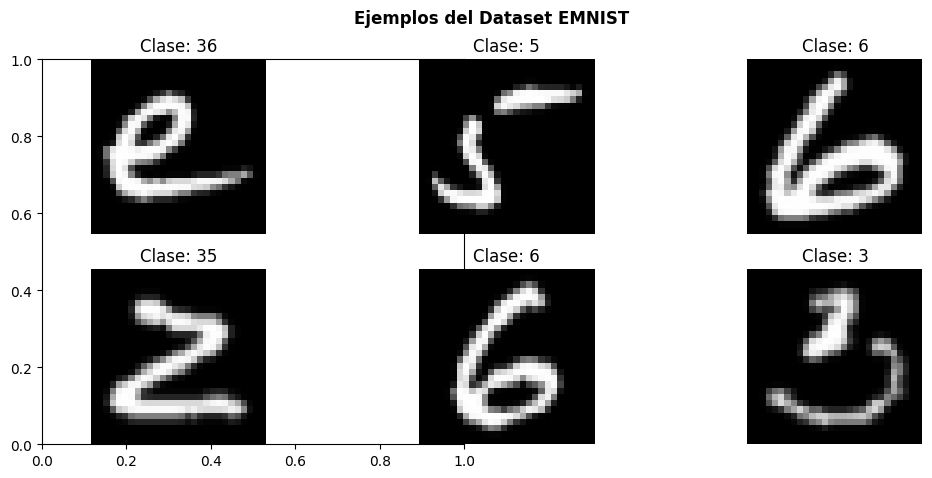

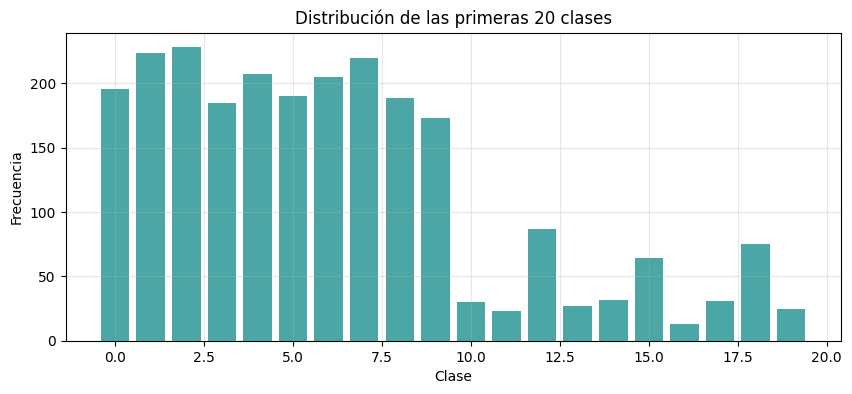

In [ ]:
# VISUALIZACIÓN RÁPIDA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_train[i].squeeze(), cmap='gray')
    plt.title(f'Clase: {y_train[i]}')
    plt.axis('off')
plt.suptitle('Ejemplos del Dataset EMNIST', fontweight='bold')
plt.tight_layout()
plt.show()

# Distribución de clases
plt.figure(figsize=(10, 4))
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique[:20], counts[:20], alpha=0.7, color='teal')
plt.title('Distribución de las primeras 20 clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

📈 GENERANDO GRÁFICAS DE ENTRENAMIENTO...


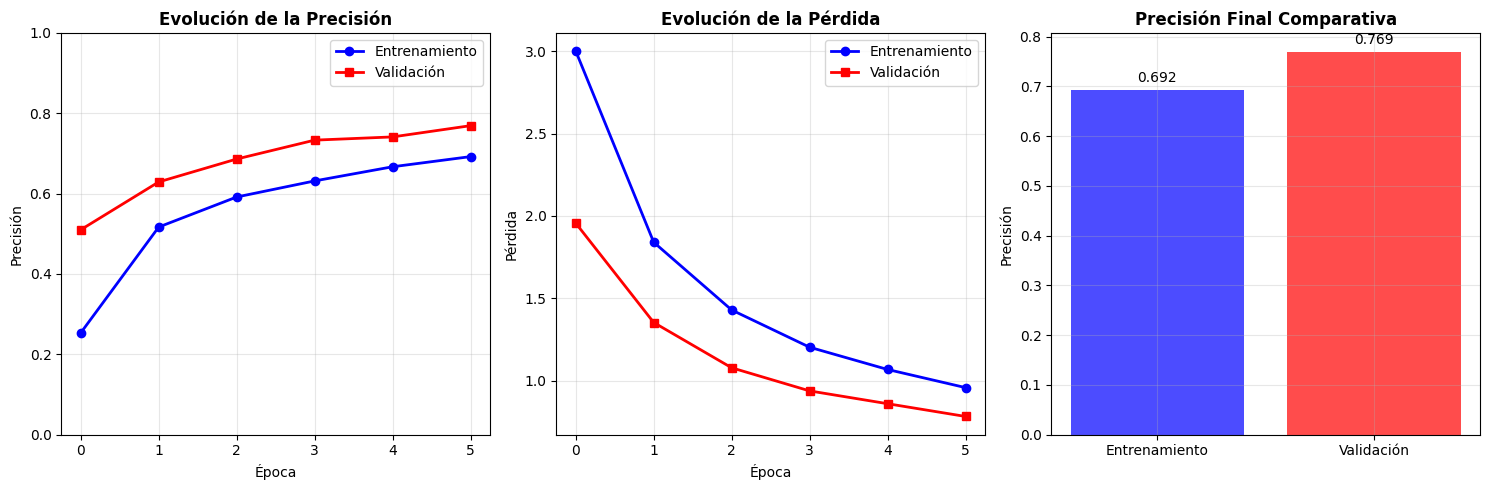

In [ ]:
# CELDA 3 - GRÁFICAS DE ENTRENAMIENTO
print("📈 GENERANDO GRÁFICAS DE ENTRENAMIENTO...")

plt.figure(figsize=(15, 5))

# 1. Precisión
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], 'b-', label='Entrenamiento', linewidth=2, marker='o')
plt.plot(history.history['val_accuracy'], 'r-', label='Validación', linewidth=2, marker='s')
plt.title('Evolución de la Precisión', fontweight='bold')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)

# 2. Pérdida
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], 'b-', label='Entrenamiento', linewidth=2, marker='o')
plt.plot(history.history['val_loss'], 'r-', label='Validación', linewidth=2, marker='s')
plt.title('Evolución de la Pérdida', fontweight='bold')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Comparación Train vs Test
plt.subplot(1, 3, 3)
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
categories = ['Entrenamiento', 'Validación']
values = [final_train_acc, final_val_acc]
colors = ['blue', 'red']
bars = plt.bar(categories, values, color=colors, alpha=0.7)
plt.title('Precisión Final Comparativa', fontweight='bold')
plt.ylabel('Precisión')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🎯 GENERANDO MATRIZ DE CONFUSIÓN...


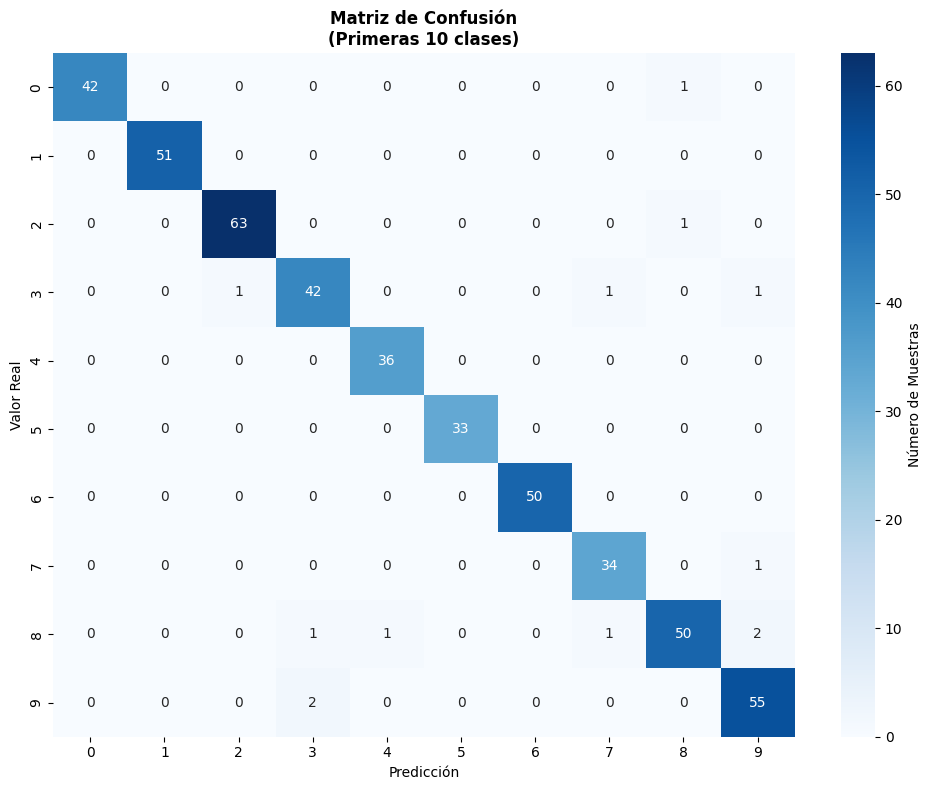


📋 REPORTE DE CLASIFICACIÓN (Primeras 10 clases):
              precision    recall  f1-score   support

     Clase 0       0.60      0.79      0.68        53
     Clase 1       0.57      0.96      0.72        53
     Clase 2       0.90      0.94      0.92        67
     Clase 3       0.91      0.91      0.91        46
     Clase 4       0.80      0.90      0.85        40
     Clase 5       0.67      0.85      0.75        39
     Clase 6       0.94      0.94      0.94        53
     Clase 7       0.85      0.94      0.89        36
     Clase 8       0.82      0.85      0.83        59
     Clase 9       0.86      0.96      0.91        57
    Clase 10       1.00      0.56      0.71         9
    Clase 11       0.00      0.00      0.00         4
    Clase 12       1.00      0.89      0.94        18
    Clase 13       0.57      0.44      0.50         9
    Clase 14       1.00      0.33      0.50         6
    Clase 15       0.67      0.89      0.76         9
    Clase 17       0.67      0.

In [ ]:
# CELDA 4 - MATRIZ DE CONFUSIÓN
print("🎯 GENERANDO MATRIZ DE CONFUSIÓN...")

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)

# Mostrar solo las primeras 10 clases para mejor visualización
classes_to_show = min(10, num_classes)
cm_subset = cm[:classes_to_show, :classes_to_show]

sns.heatmap(cm_subset, annot=True, fmt='d', cmap='Blues',
              xticklabels=range(classes_to_show),
              yticklabels=range(classes_to_show),
              cbar_kws={'label': 'Número de Muestras'})

plt.title(f'Matriz de Confusión\n(Primeras {classes_to_show} clases)', fontweight='bold')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.tight_layout()
plt.show()

# Mostrar reporte de clasificación
print("\n📋 REPORTE DE CLASIFICACIÓN (Primeras 10 clases):")
# Get the unique labels present in both y_test and y_pred_classes
unique_labels = np.unique(np.concatenate((y_test, y_pred_classes)))
# Create target names based on the unique labels
target_names_subset = [f'Clase {i}' for i in unique_labels]

print(classification_report(y_test, y_pred_classes,
                            labels=unique_labels, # Specify the labels to use
                            target_names=target_names_subset, # Use the subset of target names
                            zero_division=0))

🔍 ANALIZANDO PREDICCIONES...


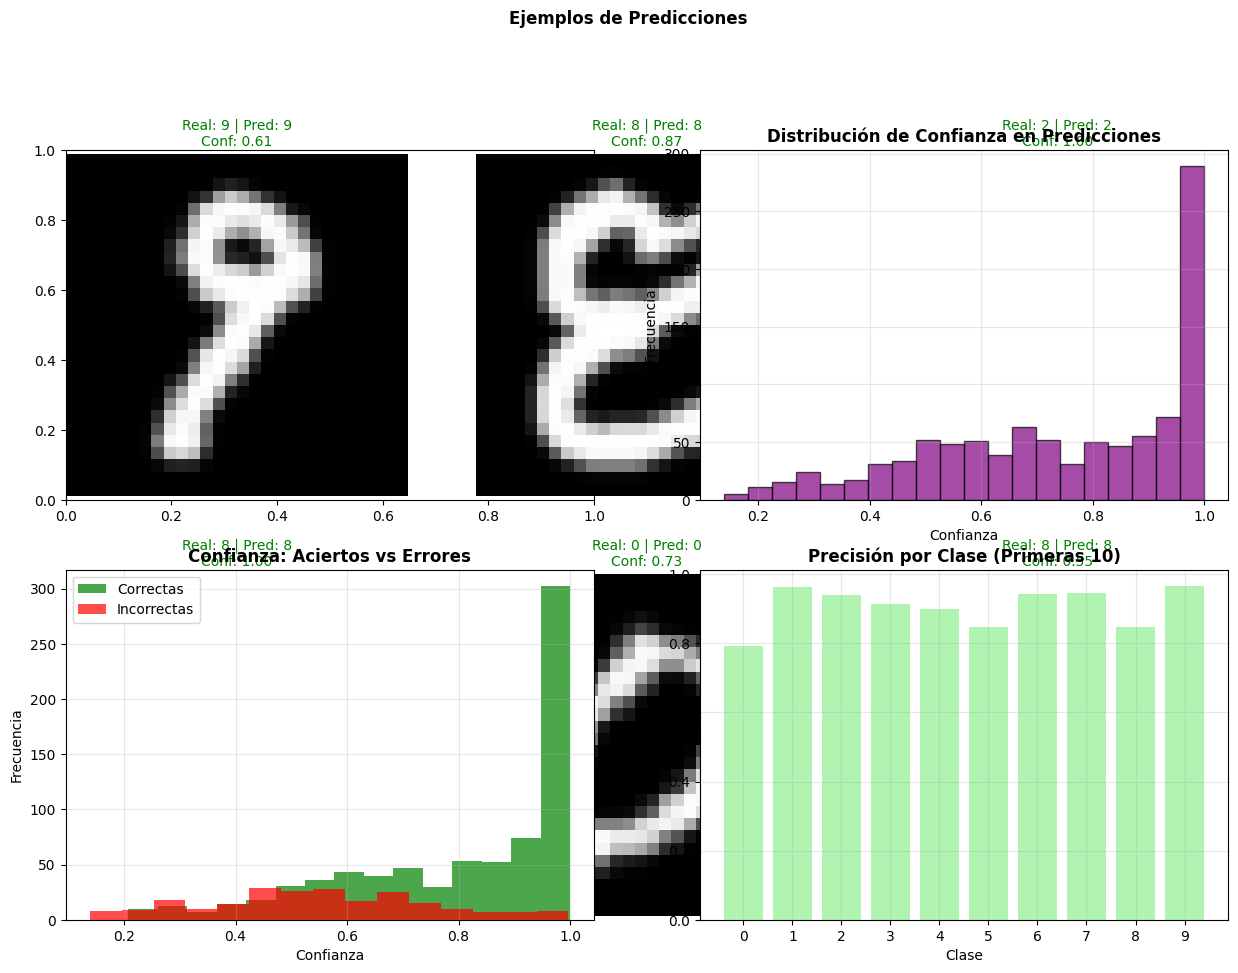

In [ ]:
# CELDA 5 - ANÁLISIS DE PREDICCIONES
print("🔍 ANALIZANDO PREDICCIONES...")

plt.figure(figsize=(15, 10))

# 1. Predicciones de ejemplo
plt.subplot(2, 2, 1)
sample_indices = np.random.randint(0, len(x_test), 6)
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 3, i + 1)
    plt.imshow(x_test[idx].squeeze(), cmap='gray')
    true_label = y_test[idx]
    pred_label = np.argmax(y_pred[idx])
    confidence = np.max(y_pred[idx])

    color = 'green' if true_label == pred_label else 'red'
    plt.title(f'Real: {true_label} | Pred: {pred_label}\nConf: {confidence:.2f}',
             color=color, fontsize=10)
    plt.axis('off')
plt.suptitle('Ejemplos de Predicciones', fontweight='bold', y=1.02)
plt.tight_layout()

# 2. Distribución de confianza
plt.subplot(2, 2, 2)
confidences = np.max(y_pred, axis=1)
plt.hist(confidences, bins=20, color='purple', alpha=0.7, edgecolor='black')
plt.title('Distribución de Confianza en Predicciones', fontweight='bold')
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

# 3. Aciertos vs Errores por confianza
plt.subplot(2, 2, 3)
correct_predictions = y_pred_classes == y_test
correct_confidences = confidences[correct_predictions]
wrong_confidences = confidences[~correct_predictions]

plt.hist(correct_confidences, bins=15, alpha=0.7, label='Correctas', color='green')
plt.hist(wrong_confidences, bins=15, alpha=0.7, label='Incorrectas', color='red')
plt.title('Confianza: Aciertos vs Errores', fontweight='bold')
plt.xlabel('Confianza')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Precisión por clase
plt.subplot(2, 2, 4)
class_accuracy = []
for class_id in range(min(10, num_classes)):
    class_mask = y_test == class_id
    if np.sum(class_mask) > 0:
        class_acc = np.mean(y_pred_classes[class_mask] == y_test[class_mask])
        class_accuracy.append(class_acc)
    else:
        class_accuracy.append(0)

plt.bar(range(len(class_accuracy)), class_accuracy, color='lightgreen', alpha=0.7)
plt.title('Precisión por Clase (Primeras 10)', fontweight='bold')
plt.xlabel('Clase')
plt.ylabel('Precisión')
plt.xticks(range(len(class_accuracy)))
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# CELDA 6 - RESUMEN EJECUTIVO FINAL
print("🏆 RESUMEN EJECUTIVO FINAL")
print("=" * 60)

# Calcular métricas finales
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
overall_accuracy = test_acc

print(f"📊 MÉTRICAS PRINCIPALES:")
print(f"   • Precisión Final Entrenamiento: {final_train_acc:.4f}")
print(f"   • Precisión Final Validación: {final_val_acc:.4f}")
print(f"   • Precisión General del Modelo: {overall_accuracy:.4f}")
print(f"   • Tasa de Error: {1 - overall_accuracy:.4f}")

print(f"\n📈 ESTADÍSTICAS DEL MODELO:")
print(f"   • Épocas ejecutadas: {len(history.history['accuracy'])}")
print(f"   • Total de parámetros: {model.count_params():,}")
print(f"   • Mejor precisión validación: {np.max(history.history['val_accuracy']):.4f}")

print(f"\n🎯 EVALUACIÓN DEL RENDIMIENTO:")
if overall_accuracy > 0.85:
    print("   ✅ EXCELENTE - Modelo con rendimiento sobresaliente")
elif overall_accuracy > 0.75:
    print("   ✅ BUENO - Modelo con buen rendimiento")
elif overall_accuracy > 0.60:
    print("   ⚠️  ACEPTABLE - Rendimiento moderado")
else:
    print("   🔄 MEJORABLE - Se recomienda optimización")

print(f"\n💡 RECOMENDACIONES:")
if final_val_acc < final_train_acc - 0.1:
    print("   • Posible sobreentrenamiento - considerar regularización")
if overall_accuracy < 0.7:
    print("   • Aumentar complejidad del modelo o cantidad de datos")
if np.std(history.history['val_accuracy']) > 0.15:
    print("   • Alta variabilidad - estabilizar entrenamiento")

print("=" * 60)
print("✅ ANÁLISIS COMPLETADO - TODAS LAS GRÁFICAS GENERADAS")

🏆 RESUMEN EJECUTIVO FINAL
📊 MÉTRICAS PRINCIPALES:
   • Precisión Final Entrenamiento: 0.6920
   • Precisión Final Validación: 0.7690
   • Precisión General del Modelo: 0.7690
   • Tasa de Error: 0.2310

📈 ESTADÍSTICAS DEL MODELO:
   • Épocas ejecutadas: 6
   • Total de parámetros: 124,335
   • Mejor precisión validación: 0.7690

🎯 EVALUACIÓN DEL RENDIMIENTO:
   ✅ BUENO - Modelo con buen rendimiento

💡 RECOMENDACIONES:
✅ ANÁLISIS COMPLETADO - TODAS LAS GRÁFICAS GENERADAS


🖼️ SISTEMA DE PREDICCIÓN CON IMÁGENES PERSONALIZADAS
📤 OPCIÓN 1: Subir imagen desde tu computadora


Saving 49.jpg to 49.jpg

🔍 Analizando: 49.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


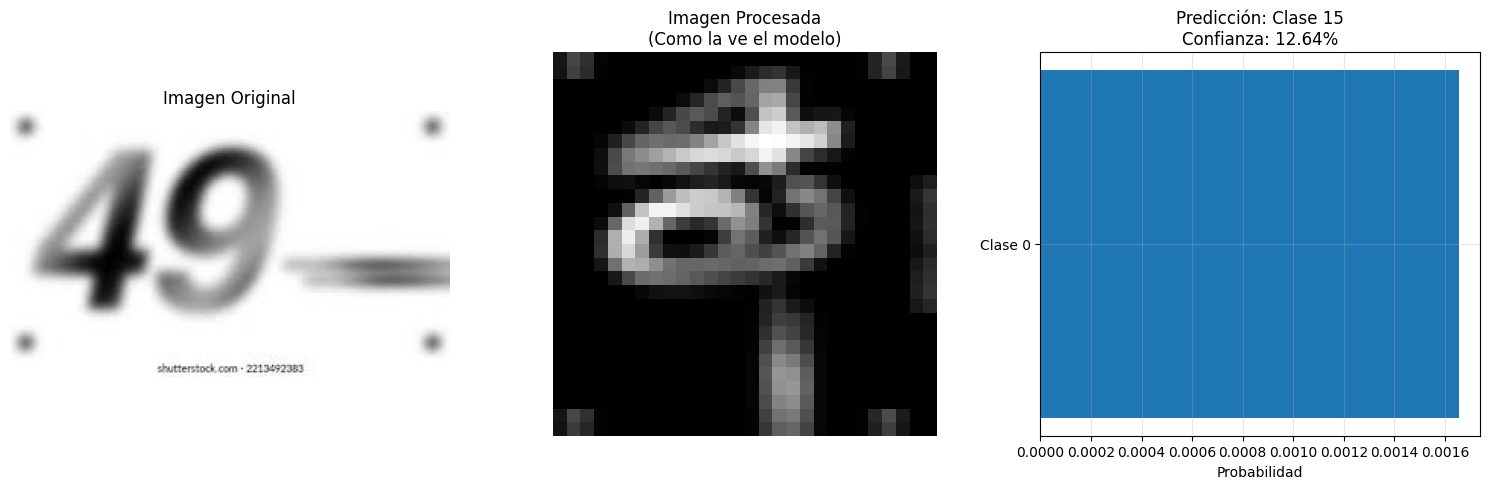

🎯 RESULTADO:
   • Clase predicha: 15
   • Confianza: 12.64%
   • Archivo: 49.jpg

🧪 OPCIÓN 2: Probar con ejemplos del dataset de test

📊 Ejemplo 1/5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


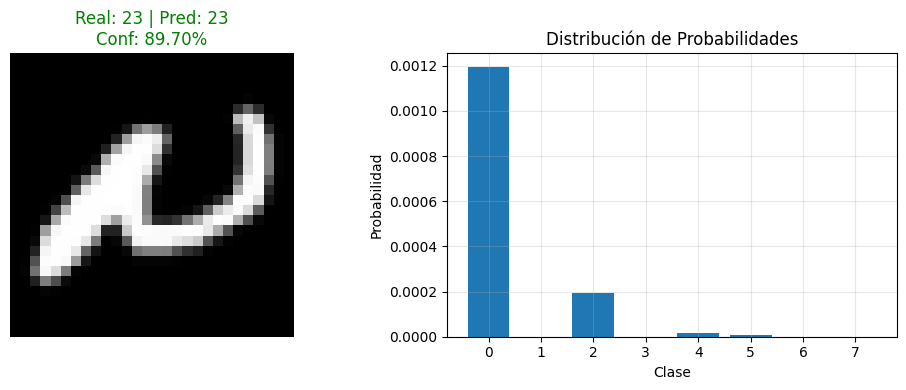

   ✅ Real: 23 | 🎯 Predicho: 23 | 📊 Confianza: 89.70%

📊 Ejemplo 2/5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


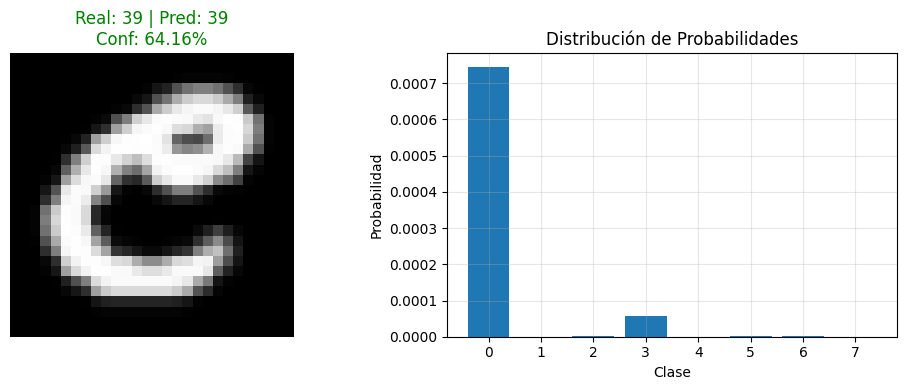

   ✅ Real: 39 | 🎯 Predicho: 39 | 📊 Confianza: 64.16%

📊 Ejemplo 3/5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


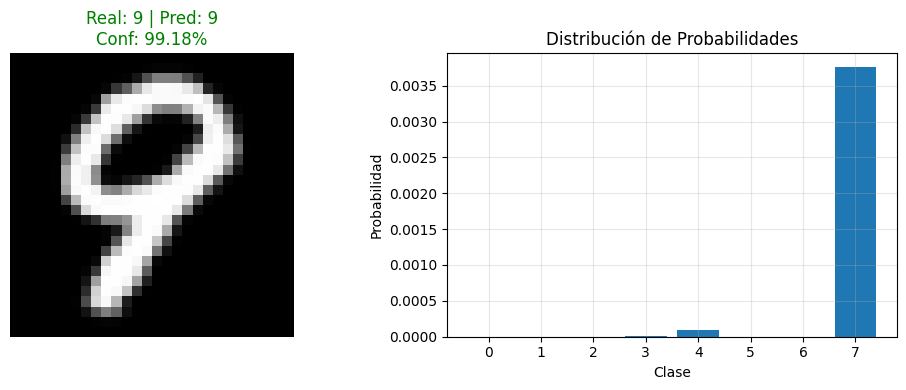

   ✅ Real: 9 | 🎯 Predicho: 9 | 📊 Confianza: 99.18%

📊 Ejemplo 4/5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


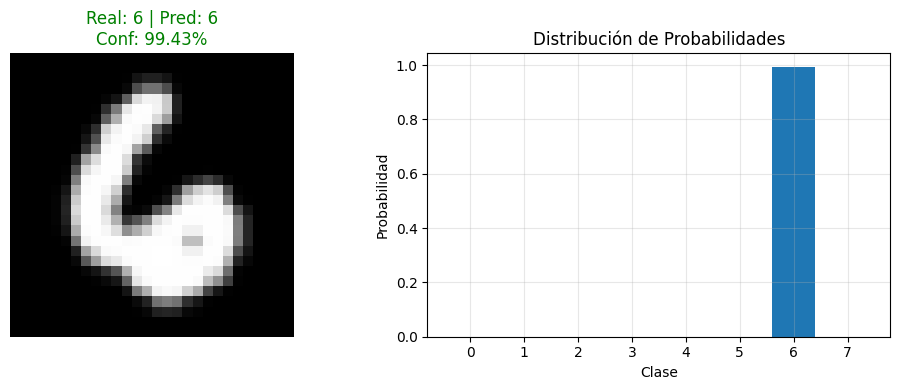

   ✅ Real: 6 | 🎯 Predicho: 6 | 📊 Confianza: 99.43%

📊 Ejemplo 5/5:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


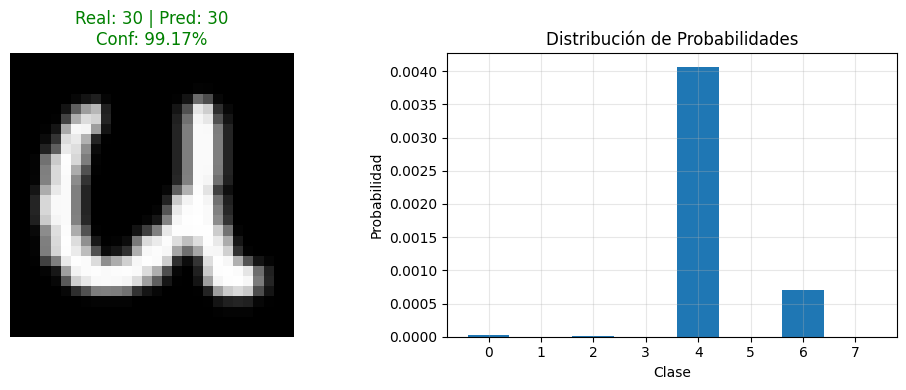

   ✅ Real: 30 | 🎯 Predicho: 30 | 📊 Confianza: 99.17%

✏️  OPCIÓN 3: Generar imagen de prueba automáticamente
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


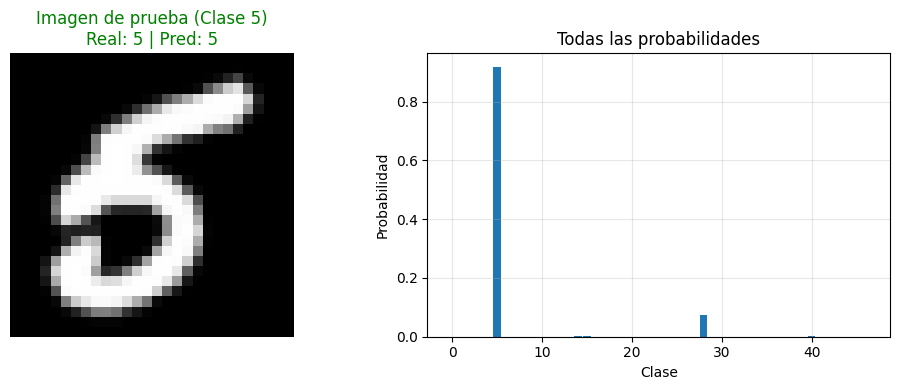

🎯 Prueba con clase 5:
   • Real: 5
   • Predicho: 5
   • Confianza: 91.94%

🏆 TOP 5 PREDICCIONES:
   1. Clase 5: 91.94%
   2. Clase 28: 7.27%
   3. Clase 14: 0.20%
   4. Clase 40: 0.18%
   5. Clase 15: 0.12%

🎉 SISTEMA DE PREDICCIÓN LISTO!

💡 INSTRUCCIONES DE USO:
1. Ejecuta esta celda
2. Sube una imagen de un dígito o letra (blanco sobre fondo negro)
3. El modelo predecirá la clase con su confianza
4. También puedes usar las opciones 2 y 3 para pruebas rápidas


In [ ]:
# CELDA EXTRA - PREDICCIÓN CON IMÁGENES PROPIAS
print("🖼️ SISTEMA DE PREDICCIÓN CON IMÁGENES PERSONALIZADAS")
print("=" * 60)

import cv2
from google.colab import files
from PIL import Image
import io

def preprocess_custom_image(image_path, target_size=(28, 28)):
    """
    Preprocesa una imagen personalizada para que sea compatible con el modelo EMNIST
    """
    # Cargar imagen
    image = Image.open(image_path).convert('L')  # Convertir a escala de grises

    # Redimensionar a 28x28
    image = image.resize(target_size)

    # Convertir a array numpy
    image_array = np.array(image)

    # Invertir colores (EMNIST tiene fondo negro y letras blancas)
    image_array = 255 - image_array

    # Normalizar
    image_array = image_array.astype('float32') / 255.0

    # Transponer (corrección de orientación EMNIST)
    image_array = np.transpose(image_array)

    # Agregar dimensiones para batch y canal
    image_array = image_array.reshape(1, 28, 28, 1)

    return image_array

def predict_custom_image(model, image_array):
    """
    Realiza predicción en una imagen personalizada
    """
    # Hacer predicción
    prediction = model.predict(image_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    return predicted_class, confidence, prediction

def display_prediction_result(original_image, processed_image, prediction, confidence, all_predictions, class_names=None):
    """
    Muestra los resultados de la predicción
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Imagen original
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    # Imagen procesada (como la ve el modelo)
    axes[1].imshow(processed_image.squeeze(), cmap='gray')
    axes[1].set_title('Imagen Procesada\n(Como la ve el modelo)')
    axes[1].axis('off')

    # Gráfico de probabilidades
    classes_to_show = min(10, len(all_predictions))
    if class_names is None:
        class_names = [f'Clase {i}' for i in range(classes_to_show)]

    axes[2].barh(range(classes_to_show), all_predictions[0][:classes_to_show])
    axes[2].set_yticks(range(classes_to_show))
    axes[2].set_yticklabels(class_names[:classes_to_show])
    axes[2].set_xlabel('Probabilidad')
    axes[2].set_title(f'Predicción: Clase {prediction}\nConfianza: {confidence:.2%}')
    axes[2].grid(True, alpha=0.3)

    # Resaltar la clase predicha
    if prediction < classes_to_show:
        axes[2].get_children()[prediction].set_color('red')

    plt.tight_layout()
    plt.show()

# OPCIÓN 1: SUBIR ARCHIVO DESDE COMPUTADORA
print("📤 OPCIÓN 1: Subir imagen desde tu computadora")
uploaded = files.upload()

if uploaded:
    for filename in uploaded.keys():
        print(f"\n🔍 Analizando: {filename}")

        # Preprocesar imagen
        custom_image = preprocess_custom_image(filename)

        # Hacer predicción
        predicted_class, confidence, all_predictions = predict_custom_image(model, custom_image)

        # Mostrar resultados
        original_img = Image.open(filename).convert('L')
        display_prediction_result(original_img, custom_image, predicted_class, confidence, all_predictions)

        print(f"🎯 RESULTADO:")
        print(f"   • Clase predicha: {predicted_class}")
        print(f"   • Confianza: {confidence:.2%}")
        print(f"   • Archivo: {filename}")

# OPCIÓN 2: PROBAR CON IMÁGENES DE EJEMPLO DEL TEST SET
print("\n" + "="*50)
print("🧪 OPCIÓN 2: Probar con ejemplos del dataset de test")
print("="*50)

# Seleccionar algunas imágenes aleatorias del test set
num_test_examples = 5
random_indices = np.random.choice(len(x_test), num_test_examples, replace=False)

for i, idx in enumerate(random_indices):
    print(f"\n📊 Ejemplo {i+1}/{num_test_examples}:")

    # Obtener imagen y etiqueta real
    test_image = x_test[idx:idx+1]  # Mantener dimensión de batch
    true_label = y_test[idx]

    # Hacer predicción
    predicted_class, confidence, all_predictions = predict_custom_image(model, test_image)

    # Mostrar resultados
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Imagen
    axes[0].imshow(test_image.squeeze(), cmap='gray')
    color = 'green' if predicted_class == true_label else 'red'
    axes[0].set_title(f'Real: {true_label} | Pred: {predicted_class}\nConf: {confidence:.2%}', color=color)
    axes[0].axis('off')

    # Probabilidades
    classes_to_show = min(8, len(all_predictions[0]))
    axes[1].bar(range(classes_to_show), all_predictions[0][:classes_to_show])
    axes[1].set_xticks(range(classes_to_show))
    axes[1].set_xlabel('Clase')
    axes[1].set_ylabel('Probabilidad')
    axes[1].set_title('Distribución de Probabilidades')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"   ✅ Real: {true_label} | 🎯 Predicho: {predicted_class} | 📊 Confianza: {confidence:.2%}")

# OPCIÓN 3: CREAR IMAGEN MANUALMENTE (PARA PRUEBAS RÁPIDAS)
print("\n" + "="*50)
print("✏️  OPCIÓN 3: Generar imagen de prueba automáticamente")
print("="*50)

# Crear una imagen de prueba simple (número 5 como ejemplo)
test_digit = 5  # Puedes cambiar este número para probar diferentes dígitos/letras

# Buscar una imagen de la clase deseada en el test set
class_indices = np.where(y_test == test_digit)[0]
if len(class_indices) > 0:
    example_idx = class_indices[0]
    test_image = x_test[example_idx:example_idx+1]
    true_label = y_test[example_idx]

    # Hacer predicción
    predicted_class, confidence, all_predictions = predict_custom_image(model, test_image)

    # Mostrar resultados
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    axes[0].imshow(test_image.squeeze(), cmap='gray')
    color = 'green' if predicted_class == true_label else 'red'
    axes[0].set_title(f'Imagen de prueba (Clase {test_digit})\nReal: {true_label} | Pred: {predicted_class}', color=color)
    axes[0].axis('off')

    axes[1].bar(range(len(all_predictions[0])), all_predictions[0])
    axes[1].set_xlabel('Clase')
    axes[1].set_ylabel('Probabilidad')
    axes[1].set_title('Todas las probabilidades')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"🎯 Prueba con clase {test_digit}:")
    print(f"   • Real: {true_label}")
    print(f"   • Predicho: {predicted_class}")
    print(f"   • Confianza: {confidence:.2%}")

    # Mostrar top 5 predicciones
    top_5_indices = np.argsort(all_predictions[0])[-5:][::-1]
    top_5_confidences = all_predictions[0][top_5_indices]

    print(f"\n🏆 TOP 5 PREDICCIONES:")
    for i, (cls, conf) in enumerate(zip(top_5_indices, top_5_confidences)):
        print(f"   {i+1}. Clase {cls}: {conf:.2%}")

print("\n" + "="*60)
print("🎉 SISTEMA DE PREDICCIÓN LISTO!")
print("="*60)
print("\n💡 INSTRUCCIONES DE USO:")
print("1. Ejecuta esta celda")
print("2. Sube una imagen de un dígito o letra (blanco sobre fondo negro)")
print("3. El modelo predecirá la clase con su confianza")
print("4. También puedes usar las opciones 2 y 3 para pruebas rápidas")